In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split #Pour l'entrainement et le test
from sklearn.linear_model import LogisticRegression #Pour la regression logistique
from sklearn.metrics import accuracy_score #Pour l'evaluation du modele

In [122]:
#data = pd.read_csv('heart_disease_data.csv')
data = pd.read_csv('heart.csv')
print(data.isnull().sum())
data.head()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [123]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [124]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

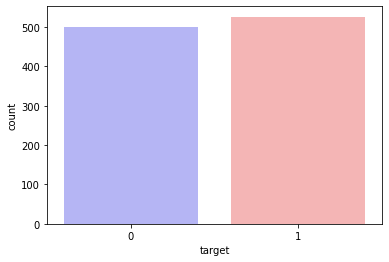

In [125]:
sns.countplot(x='target', data=data, palette='bwr')

ici on vois que le nombre de personne qui ont une maladie cardiaque est plus grand que le nombre de personne qui n'en ont pas

<h1>Separation des données</h1>

In [126]:
X = data.drop(['target'], axis=1)
Y = data['target']

<h1>Transformation en données de test et train</h1>

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


<h1>Entrainement du Model</h1>

In [128]:
model = LogisticRegression()

#Entrainement du modele
model = model.fit(X_train, Y_train)

c:\Users\Carl Elias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
#Evaluation du modele d'netrainement sur le jeu de d'entrainement 
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy du modele sur le jeu d'entrainement : ", training_data_accuracy, 'soit : ', (training_data_accuracy*100).round(2), '%')

Accuracy du modele sur le jeu d'entrainement :  0.8621951219512195 soit :  86.22 %


In [130]:

#Evaluation du modele d'netrainement sur le jeu de test
X_test_prediction = model.predict(X_test)
training_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy du modele sur le jeu de test : ", training_data_accuracy, 'soit : ', (training_data_accuracy*100).round(2), '%')

Accuracy du modele sur le jeu de test :  0.8634146341463415 soit :  86.34 %


Exemple de 
prediction a l'aide du modele

In [131]:
model.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])[0]

c:\Users\Carl Elias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

<h1>Système predictif</h1>

In [132]:
donnee_entree = (58,0,0,100,248,0,0,122,0,1,1,0,2)
donnee_a_predire = pd.DataFrame([donnee_entree])
prediction = model.predict(donnee_a_predire)

if prediction == 1:
    print("Le patient a une maladie cardiaque")
if prediction == 0:
    print("Le patient n'a pas de maladie cardiaque")

Le patient a une maladie cardiaque


c:\Users\Carl Elias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
